<a href="https://colab.research.google.com/github/mayorofdata/Customer-Churn-Prediction-using-Logistic-Regression/blob/master/Customer_Churn_Prediction_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background Statement

Customer attrition, which is described in this project as customer churn is an important business metrics in most organizations. Organizations such as Telephone service companies, Internet service providers and TV subscription companies are the most affected as customer churn has direct impact on their revenues. Companies from these sectors, therefore tends to need the help of data analytics to better understand the rates of which their customer churn and the factors or variables that are responsible for the defect.  

Relevant visualization with dashboard and analysis is performed using Tableau or Power BI to better understand the behavior of customer and underlying patterns in the dataset. The dataset will be used to establish causal links within the different variables. 

Furthermore, the future of the business and the likelihood of customer churning will be predicted using Python by estimating the relationship between the variables. Focus will be made on variables that are important in customer retention and promptly detecting customers who are most venerable to churn. 

# Problem Statement
The aim of this project is to analyse the customers behaviour by predicting which customers will churn the company. 

The dataset contains the following attributes:

Inputs:
customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity,
OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod,   MonthlyCharges, TotalCharges         

Outputs:
- Churn(No: customers who stay, Yes: Customers who churn)

The following steps are followed for the data analysis and Prediction:
- Step 1: Import Libraries and datasets
- Step 2: EDA - Explore/Visualize Dataset
- Step 3: Prepare the data for training
- Step 4: Model Training
- Step 5: Model Testing
- Step 6: Model Accuracy

![](https://drive.google.com/uc?export=view&id=1pt__WHzBlTxEgC4L7mWTxB4gpz6baCaF)

# The model is created using logistic regresssion
- Logistic regression is a statistical and machine learning technique for classifying records of a dataset, based on the values of the input fields.
- Logistic regression is analogous to linear regression but tries to predict a categorical or discrete target field instead of a numeric one.
- In logistic regression, we predict a variable which is binary, such as, Yes/No, TRUE/FALSE, successful or Not successful, pregnant/Not pregnant, and so on, all of which can all be coded as 0 or 1.
- Logistic regression returns a probability score between 0 and 1 for a given sample of data. It predicts the probability of that sample, and we map the cases to a discrete class based on that probability.

![](https://drive.google.com/uc?export=view&id=1ORVrPxyvnGFmbjarr0iOQJr3adDqZd8p)

# Step #1: Import Libraries and datasets

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read the data using pandas dataframe
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/DATA-475/Telco-Customer-Churn.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Show the data first five rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Show the data last five rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Step #2: EDA - Explore/Visualize Dataset

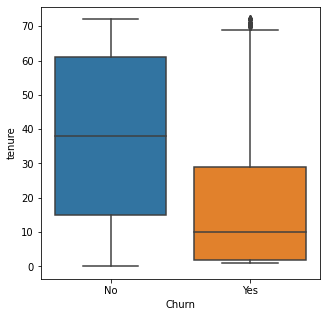

In [12]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Churn', y='tenure',data=df)

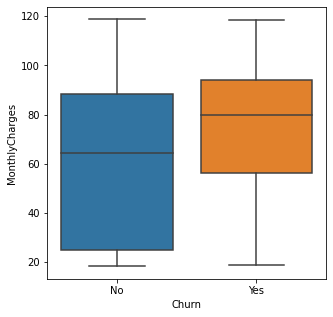

In [13]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Churn', y='MonthlyCharges',data=df)

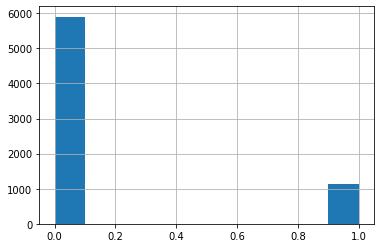

In [14]:
df['SeniorCitizen'].hist()

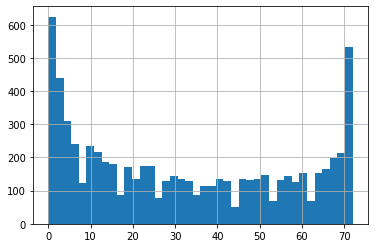

In [15]:
df['tenure'].hist(bins = 40)

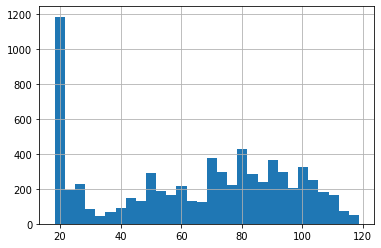

In [16]:
df['MonthlyCharges'].hist(bins = 30)

In [17]:
#Converting the categorical values used as input for the prediction into numeric variables.
#This approach used for the conversion is called one hot encoding

df = pd.get_dummies(df, columns=["PaperlessBilling", "PaymentMethod", "Contract", "InternetService", "TechSupport"])

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,29.85,29.85,No,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,56.95,1889.5,No,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,53.85,108.15,Yes,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,42.30,1840.75,No,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,No,No,No,70.70,151.65,Yes,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


In [19]:
non_churner = df[df["Churn"]=="No"]
churner = df[df["Churn"]=="Yes"]

In [20]:
print("Total =", len(df))

print("Number of customers that stay =", len(non_churner))
print("Percentage of customers that stay =", '%.2f'%(1.*len(non_churner)/len(df)*100.0), "%")
 
print("Number of customers that churn =", len(churner))
print("Percentage of Number of customers that churn =", '%.2f'%(1.*len(churner)/len(df)*100.0), "%")

Total = 7043
Number of customers that stay = 5174
Percentage of customers that stay = 73.46 %
Number of customers that churn = 1869
Percentage of Number of customers that churn = 26.54 %


# Step #3: Prepare the data for training

In [21]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,29.85,29.85,No,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,56.95,1889.5,No,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,53.85,108.15,Yes,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,Yes,No,No,42.30,1840.75,No,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,No,No,No,70.70,151.65,Yes,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,Yes,No,Yes,Yes,Yes,84.80,1990.5,No,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,No,Yes,Yes,Yes,Yes,103.20,7362.9,No,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Yes,No,No,No,No,29.60,346.45,No,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,No,No,No,No,No,74.40,306.6,Yes,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0


In [22]:
#Let's drop the attributes not needed
df.drop(["customerID",
         "gender",
         "SeniorCitizen",
         "Partner", 
         "Dependents",
         "PhoneService",
         "MultipleLines",
         "OnlineSecurity",
         "OnlineBackup",
         "DeviceProtection",
         "StreamingTV",
         "StreamingMovies",
         "TotalCharges"
         
        ],axis=1,inplace=True
       )


In [23]:
df

,tenure,MonthlyCharges,Churn,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,29.85,No,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
1,34,56.95,No,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0
2,2,53.85,Yes,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0
3,45,42.30,No,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1
4,2,70.70,Yes,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,No,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1
7039,72,103.20,No,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
7040,11,29.60,No,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
7041,4,74.40,Yes,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0


In [24]:
#Let's drop the target coloumn before we do train test split
X = df.drop('Churn',axis=1).values
y = df['Churn'].values

In [25]:
# Feature Scaling to normalize the dataset:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Step #4: Model Training

In [26]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
y_test.shape

(1761,)

In [28]:
y_train.shape

(5282,)

In [29]:
X_train

array([[-0.34087622, -0.51388388, -0.8297975 , ...,  1.0138687 ,
        -0.52592737, -0.63943864],
       [ 0.88073469,  0.01622936,  1.20511329, ..., -0.98632101,
        -0.52592737,  1.56387171],
       [-1.19600386, -0.81799273, -0.8297975 , ...,  1.0138687 ,
        -0.52592737, -0.63943864],
       ...,
       [ 1.04361615, -1.46276997,  1.20511329, ..., -0.98632101,
         1.90140322, -0.63943864],
       [-1.27744458,  0.16579109, -0.8297975 , ...,  1.0138687 ,
        -0.52592737, -0.63943864],
       [-1.15528349, -1.47440255,  1.20511329, ..., -0.98632101,
         1.90140322, -0.63943864]])

In [30]:
y_train

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [31]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Step #5: Model Testing

In [32]:
# y_proba returns estimates for all classes, ordered by the label of classes.
# So, the first column is the probability of non churn class, P(Y=No|X), 
# and second column is probability of churn class, P(Y=Yes|X):

y_proba = classifier.predict_proba(X_train)
y_proba

array([[0.75525729, 0.24474271],
       [0.96925158, 0.03074842],
       [0.59628138, 0.40371862],
       ...,
       [0.99222344, 0.00777656],
       [0.24800549, 0.75199451],
       [0.85083446, 0.14916554]])

In [33]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [34]:
y_train

array(['No', 'No', 'Yes', ..., 'No', 'Yes', 'No'], dtype=object)

In [35]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

# Step #6: Model Accuracy

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. 

It allows the visualization of the performance of an algorithm.

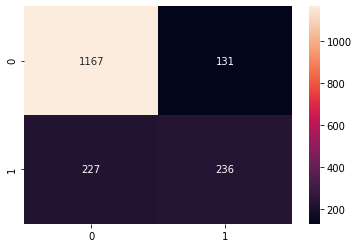

In [36]:
# Checking the accuracy of classifier using confusion matrix.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [37]:
# we can calculate precision and recall as well as the F1-score of each label

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1298
         Yes       0.64      0.51      0.57       463

    accuracy                           0.80      1761
   macro avg       0.74      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761

